<a href="https://colab.research.google.com/github/Isurie/Text-Classification-Module/blob/master/TextPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sinling

In [ ]:
pip install advertools

In [ ]:
pip install translate

In [ ]:
pip install pyenchant

In [ ]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
from nltk.tokenize import sent_tokenize,word_tokenize,TweetTokenizer
from nltk.probability import FreqDist
import advertools as adv
from pathlib import Path
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn import linear_model

import codecs
import nltk
nltk.download('punkt')
import re

from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataLabeled.csv to DataLabeled (1).csv


0     "RT @IndrajithLk: "ඝරසරප" චිත්‍රපටය, පහළ තියෙන...
1     "@NightWingzzz @lishwebber @Nimezzz මොකක් හරි ...
2     "@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...
3     "@MrThila_ @maalupaan @punchi_kella @anuwa01 @...
4     "විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......
5     "RT @SaliyaT_R: @fernandoharin ලැජ්ජයි ස⁣හෝදරය...
6     "@fernandoharin ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ ද...
7     "@She_is_Nu @nthathsaranii ඇයි මං තම්බි වගේද ප...
8     "@Sagara_9 ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහ...
9     "RT @SaliyaT_R: පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට...
10    "RT @ApiWenuwen: ඉතිහාසය ඉදිරියේ මෙවැනි හෙළිදර...
Name: Text, dtype: object


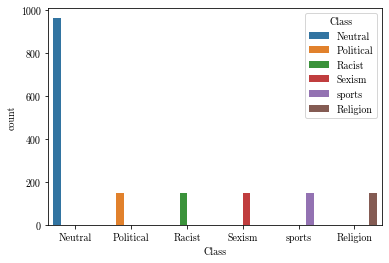

In [ ]:
# %% read csv file data
import matplotlib.pyplot as plt
import seaborn as sns

CSV_FILE = pd.read_csv('DataLabeled.csv')
#pd.read_csv(Path().joinpath('data','traindata2.csv'))
print(CSV_FILE['Text'].head(11))
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='Class',hue='Class',data=CSV_FILE)
plt.show()

In [ ]:
df = pd.read_csv('DataLabeled.csv', error_bad_lines=False)

print(df['Text'])

0       "RT @IndrajithLk: "ඝරසරප" චිත්‍රපටය, පහළ තියෙන...
1       "@NightWingzzz @lishwebber @Nimezzz මොකක් හරි ...
2       "@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...
3       "@MrThila_ @maalupaan @punchi_kella @anuwa01 @...
4       "විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......
                              ...                        
1705    "පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු...
1706    "අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල...
1707    "22 හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භී...
1708    "# ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන ...
1709    "රාජ්‍ය අංශයේ කාන්තා ඇඳුම් පැළඳුම් සංග්‍රහය පි...
Name: Text, Length: 1710, dtype: object


Detokenioze

In [ ]:
stopwords_set = ["සහ","සමග","සමඟ","අහා","ආහ්","ආ","ඕහෝ","අනේ","අඳෝ","අපොයි","පෝ","අයියෝ","ආයි","ඌයි","චී","චිහ්","චික්","හෝ‍","දෝ",
                 "දෝහෝ","මෙන්","සේ","වැනි","බඳු","වන්","අයුරු","අයුරින්","ලෙස","වැඩි","ශ්‍රී","හා","ය","නිසා","නිසාවෙන්","බවට","බව","බවෙන්","නම්","වැඩි","සිට",
                 "දී","මහා","මහ","පමණ","පමණින්","පමන","වන","විට","විටින්","මේ","මෙලෙස","මෙයින්","ඇති","ලෙස","සිදු","වශයෙන්","යන","සඳහා","මගින්","හෝ‍",
                 "ඉතා","ඒ","එම","ද","අතර","විසින්","සමග","පිළිබඳව","පිළිබඳ","තුළ","බව","වැනි","මහ","මෙම","මෙහි","මේ","වෙත","වෙතින්","වෙතට","වෙනුවෙන්",
                 "වෙනුවට","වෙන","ගැන","නෑ","අනුව","නව","පිළිබඳ","විශේෂ","දැනට","එහෙන්","මෙහෙන්","එහේ","මෙහේ","ම","තවත්","තව","සහ","දක්වා","ට","ගේ",
                 "එ","ක","ක්","බවත්","බවද","මත","ඇතුලු","ඇතුළු","මෙසේ","වඩා","වඩාත්ම","නිති","නිතිත්","නිතොර","නිතර","ඉක්බිති","දැන්","යලි","පුන","ඉතින්",
                 "සිට","සිටන්","පටන්","තෙක්","දක්වා","සා","තාක්","තුවක්","පවා","ද","හෝ‍","වත්","විනා","හැර","මිස","මුත්","කිම","කිම්","ඇයි","මන්ද","හෙවත්",
                 "නොහොත්","පතා","පාසා","ගානෙ","තව","ඉතා","බොහෝ","වහා","සෙද","සැනින්","හනික","එම්බා","එම්බල","බොල","නම්","වනාහි","කලී","ඉඳුරා",
                 "අන්න","ඔන්න","මෙන්න","උදෙසා","පිණිස","සඳහා","රබයා","නිසා","එනිසා","එබැවින්","බැවින්","හෙයින්","සේක්","සේක","ගැන","අනුව","පරිදි","විට",
                 "තෙක්","මෙතෙක්","මේතාක්","තුරු","තුරා","තුරාවට","තුලින්","නමුත්","එනමුත්","වස්",'මෙන්',"ලෙස","පරිදි","එහෙත්"]

In [ ]:
print(stopwords_set)

['සහ', 'සමග', 'සමඟ', 'අහා', 'ආහ්', 'ආ', 'ඕහෝ', 'අනේ', 'අඳෝ', 'අපොයි', 'පෝ', 'අයියෝ', 'ආයි', 'ඌයි', 'චී', 'චිහ්', 'චික්', 'හෝ\u200d', 'දෝ', 'දෝහෝ', 'මෙන්', 'සේ', 'වැනි', 'බඳු', 'වන්', 'අයුරු', 'අයුරින්', 'ලෙස', 'වැඩි', 'ශ්\u200dරී', 'හා', 'ය', 'නිසා', 'නිසාවෙන්', 'බවට', 'බව', 'බවෙන්', 'නම්', 'වැඩි', 'සිට', 'දී', 'මහා', 'මහ', 'පමණ', 'පමණින්', 'පමන', 'වන', 'විට', 'විටින්', 'මේ', 'මෙලෙස', 'මෙයින්', 'ඇති', 'ලෙස', 'සිදු', 'වශයෙන්', 'යන', 'සඳහා', 'මගින්', 'හෝ\u200d', 'ඉතා', 'ඒ', 'එම', 'ද', 'අතර', 'විසින්', 'සමග', 'පිළිබඳව', 'පිළිබඳ', 'තුළ', 'බව', 'වැනි', 'මහ', 'මෙම', 'මෙහි', 'මේ', 'වෙත', 'වෙතින්', 'වෙතට', 'වෙනුවෙන්', 'වෙනුවට', 'වෙන', 'ගැන', 'නෑ', 'අනුව', 'නව', 'පිළිබඳ', 'විශේෂ', 'දැනට', 'එහෙන්', 'මෙහෙන්', 'එහේ', 'මෙහේ', 'ම', 'තවත්', 'තව', 'සහ', 'දක්වා', 'ට', 'ගේ', 'එ', 'ක', 'ක්', 'බවත්', 'බවද', 'මත', 'ඇතුලු', 'ඇතුළු', 'මෙසේ', 'වඩා', 'වඩාත්ම', 'නිති', 'නිතිත්', 'නිතොර', 'නිතර', 'ඉක්බිති', 'දැන්', 'යලි', 'පුන', 'ඉතින්', 'සිට', 'සිටන්', 'පටන්', 'තෙක්', 'දක්වා', 'සා', 'තාක්', 'තුවක්', 'පවා', 'ද',

In [ ]:
def filter_stop_words(sentences):
    filtered_sentences = []
    detokenizer = Detok()
    for sentence in sentences:
        tokenized_sentence = word_tokenize(sentence)
        filtered_sentence = [word for word in tokenized_sentence if word not in stopwords_set]
        filtered_sentence = [] 
        for w in tokenized_sentence: 
            if w not in stopwords_set: 
                filtered_sentence.append(stem_word(w))
        filtered_sentences.append(filtered_sentence)
    return filtered_sentences


def detokenize(filtered_sentences):
    detokenized_sentences = []
    for sentence in filtered_sentences:
        detokenized_sentences.append(TreebankWordDetokenizer().detokenize(sentence))
    return detokenized_sentences


filtered_sentences = filter_stop_words(df['Text2'])
detokenized_sentences = detokenize(filtered_sentences)

df['filtered_sentence'] = detokenized_sentences
df['filtered_sentence'] = df['filtered_sentence'].apply(simplify_sinhalese_text).tolist()
#df['filtered_sentence'] = df['Text'].apply(remove_english_words).tolist()

#df.to_csv('SubjectivityTagged.csv')
df

Data Cleaning

In [ ]:
#%%data cleaning , tokenizing and POS tagging
df = pd.read_csv('SubjectivityTagged.csv')

def clean_data(dataframe):
    # Drop duplicate rows
    dataframe.drop_duplicates(subset='Text', inplace=True)
    #replace URL of a text
    dataframe['Text_cleaned'] = dataframe['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
    #replace mention
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].str.replace('#|@\w*','')
    #remove retweet states in the beginning such as "RT @sam92ky: "
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].str.replace('RT : ','')
    #remove numbers
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].str.replace('\d+','')

    #punctuation removal 
    string_text = dataframe['Text_cleaned'].str
    dataframe['Text_cleaned'] = string_text.translate(str.maketrans('', '', string.punctuation))
    print(string_text)

    # coerced entire coloumn to str dtype
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].astype(str)

    #translate English to sinhala
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_to_sinhala).tolist()
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_english).tolist()

    # simplify sinhala characters
    df['Text_cleaned'] = df['Text_cleaned'].apply(simplify_sinhalese_text).tolist()

    # pos tagging
    #df['Text'] = df['Text'].apply(tagger.predict).tolist()

    #print("New shape:", dataframe.shape)
    return dataframe.head()

clean_data(df)
df
df.to_csv('SubjectivityTagged.csv')

In [ ]:
#%%data cleaning , tokenizing and POS tagging
df = pd.read_csv('DataLabeled.csv')

def clean_data(dataframe):
    # Drop duplicate rows
    #dataframe.drop_duplicates(subset='Text', inplace=True)
    #replace URL of a text
    dataframe['Text_cleaned'] = dataframe['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')
    #replace mention
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].str.replace('#|@\w*','')
    #remove retweet states in the beginning such as "RT @sam92ky: "
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].str.replace('RT : ','')
    #remove numbers
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].str.replace('\d+','')

    #punctuation removal 
    string_text = dataframe['Text_cleaned'].str
    dataframe['Text_cleaned'] = string_text.translate(str.maketrans('', '', string.punctuation))
    print(string_text)

    # coerced entire coloumn to str dtype
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].astype(str)

    #translate English to sinhala
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_to_sinhala).tolist()
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_english).tolist()

    # simplify sinhala characters
    df['Text_cleaned'] = df['Text_cleaned'].apply(simplify_sinhalese_text).tolist()

    # pos tagging
    #df['Text'] = df['Text'].apply(tagger.predict).tolist()

    #print("New shape:", dataframe.shape)
    return dataframe.head()

clean_data(df)
df
#df.to_csv('imotional data (1).csv')

,Text,Class,Text_cleaned
0,"""RT @IndrajithLk: ""ඝරසරප"" චිත්‍රපටය, පහළ තියෙන...",Neutral,ගරසරප චිත්‍රපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත...
1,"""@NightWingzzz @lishwebber @Nimezzz මොකක් හරි ...",Neutral,මොකක් හරි නාට්‍යයක් තියෙන්නත් එපැයි ඉතින්
2,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා...
3,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂
4,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Political,විමලයා ගොනෙක් වගෙ ක්‍රියාවලියක වැදගත් කාලයක් හ...
...,...,...,...
1705,"""පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු...",Racist,පීටීඑ සහ අයිසීසීපීඅර් පනත යටතේ වැරදි ලෙස ගොනු ...
1706,"""අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල...",Racist,අරාබි රටවල් මුස්ලිම් නොවන සදහා සුපිරි වෙලදසැල්...
1707,"""22 හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භී...",Racist,හැවිරිදි මුස්ලිම් පිරිමි ලමයෙක් ඉස්ලාම් බීතික...
1708,"""# ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන ...",Racist,ෂ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන දේ...


Simplify sinhalese text

In [ ]:
sinhalese_chars = [
    "අ", "ආ", "ඇ", "ඈ", "ඉ", "ඊ",
    "උ", "ඌ", "ඍ", "ඎ", "ඏ", "ඐ",
    "එ", "ඒ", "ඓ", "ඔ", "ඕ", "ඖ",
    "ං", "ඃ",
    "ක", "ඛ", "ග", "ඝ", "ඞ", "ඟ",
    "ච", "ඡ", "ජ", "ඣ", "ඤ", "ඥ", "ඦ",
    "ට", "ඨ", "ඩ", "ඪ", "ණ", "ඬ",
    "ත", "ථ", "ද", "ධ", "න", "ඳ",
    "ප", "ඵ", "බ", "භ", "ම", "ඹ",
    "ය", "ර", "ල", "ව",
    "ශ", "ෂ", "ස", "හ", "ළ", "ෆ",
    "෴", "\u200d"
]
# "\u200d" is used with "යංශය" - කාව්‍ය, "රේඵය" - වර්‍තමාන, "Both" - මහාචාර්‍ය්‍ය, "රකාරාංශය" - මුද්‍රණය

sinhalese_vowel_signs = ["්", "ා", "ැ", "ෑ", "ි", "ී", "ු", "ූ", "ෘ", "ෙ", "ේ", "ෛ", "ො", "ෝ",
                         "ෞ", "ෟ", "ෲ", "ෳ", "ර්‍"]

# dictionary that maps wrong usage of vowels to correct vowels
vowel_sign_fix_dict = {
    "ෑ": "ැ",
    "ෙ" + "්": "ේ",
    "්" + "ෙ": "ේ",

    "ෙ" + "ා": "ො",
    "ා" + "ෙ": "ො",

    "ේ" + "ා": "ෝ",
    "ො" + "්": "ෝ",

    "ෙෙ": "ෛ",
    "ෘෘ": "ෲ",

    "ෙ" + "ෟ": "ෞ",
    "ෟ" + "ෙ": "ෞ",

    "ි" + "ී": "ී",
    "ී" + "ි": "ී",

    # duplicating same symbol
    "ේ" + "්": "ේ",
    "ේ" + "ෙ": "ේ",

    "ො" + "ා": "ො",
    "ො" + "ෙ": "ො",

    "ෝ" + "ා": "ෝ",
    "ෝ" + "්": "ෝ",
    "ෝ" + "ෙ": "ෝ",
    "ෝ" + "ේ": "ෝ",
    "ෝ" + "ො": "ෝ",

    "ෞ" + "ෟ": "ෞ",
    "ෞ" + "ෙ": "ෞ",

    # special cases - may be typing mistakes
    "ො" + "ෟ": "ෞ",
    "ෟ" + "ො": "ෞ",
}

simplify_characters_dict = {
    # Consonant
    "ඛ": "ක",
    "ඝ": "ග",
    "ඟ": "ග",
    "ඡ": "ච",
    "ඣ": "ජ",
    "ඦ": "ජ",
    "ඤ": "ඥ",
    "ඨ": "ට",
    "ඪ": "ඩ",
    "ණ": "න",
    "ඳ": "ද",
    "ඵ": "ප",
    "භ": "බ",
    "ඹ": "බ",
    "ශ": "ෂ",
    "ළ": "ල",

    # Vowels
    "ආ": "අ",
    "ඈ": "ඇ",
    "ඊ": "ඉ",
    "ඌ": "උ",
    "ඒ": "එ",
    "ඕ": "ඔ",

}

def is_sinhalese_letter(char: str) -> bool:
    return char in sinhalese_chars


def is_sinhalese_vowel(char: str) -> bool:
    return char in sinhalese_vowel_signs


def get_fixed_vowel(vowel: str) -> str:
    return vowel_sign_fix_dict[vowel]


def get_simplified_character(character: str) -> str:
    if len(character) != 1:
        raise TypeError("character should be a string with length 1")
    try:
        return simplify_characters_dict[character]
    except KeyError:
        return character

def simplify_sinhalese_text(text: str) -> str:
    """
    simplify
    :param text:
    :return:
    """
    modified_text = ""
    for c in text:
        modified_text += get_simplified_character(c)
    return modified_text

simplify_sinhalese_text("ඝරසරප චිත්‍රපටය පහළ තියෙන සම්බන්ධකය එකෙන් බාගත කරගන්න")

'ගරසරප චිත්\u200dරපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත කරගන්න'

In [ ]:
class SinhaleseVowelLetterFixer:
    """
    Sinhalese Language Vowel Letter Fixer
    """

    @staticmethod
    def get_fixed_text(text: str) -> str:
        """
        Fix wrong usage of vowels
        :param text: text to be fixed
        :return: fixed text with proper vowels
        """
        fixed_text = ""
        last_letter = ""
        last_vowel = ""

        for letter in text:
            if is_sinhalese_letter(letter):
                fixed_text += (last_letter + last_vowel)
                last_letter = letter
                last_vowel = ""
            elif is_sinhalese_vowel(letter):
                if last_letter == "":
                    print("Error : First letter can't be a vowel sign : " + letter)
                if last_vowel == "":
                    last_vowel = letter
                else:
                    try:
                        last_vowel = get_fixed_vowel(last_vowel + letter)
                        print(last_vowel)
                    except KeyError:
                        # fix error of mistakenly duplicate vowel
                        if last_vowel == letter:
                            continue
                        else:
                            print("Error : can't fix vowel combination " + last_vowel + " + " + letter)
            else:
                fixed_text += (last_letter + last_vowel + letter)
                last_letter = ""
                last_vowel = ""

        fixed_text += last_letter + last_vowel
        return fixed_text


corrected_text = SinhaleseVowelLetterFixer.get_fixed_text("මෑරෙන්න")
#assert correct_text == corrected_text
print(corrected_text)


මෑරෙන්න


Translate to sinhala

In [ ]:
# english-sinhala dictionary
dictionary = {}
df= pd.read_csv('en-sinhala dictionary.csv')
dictionary_file = df["En,sinhala"]

for line in dictionary_file:
    key, value = line.strip().split(",")
    dictionary[key] = value


In [ ]:
# to check whether the string contains English words(any)
def translate_english(x):
    for word1 in x.split():
        new_word = ''.join(i for i in word1 if not i.isdigit())
        x = x.replace(word1, new_word)
    for word in x.split():
        word2 = "".join(l for l in word if l not in string.punctuation)
        if re.match('[a-zA-Z]', word2) is not None:
            word1 = word2.lower()
            translated_word = dictionary.get(word1)
            if translated_word is None:
                translated_word = ''
            x = x.replace(word, translated_word)
    return x


In [ ]:
translate_words_dict = {
    "unp": "එක්සත් ජාතික පක්ෂය",
    "muslim": "මුස්ලිම්",
    "srilankanpolitics": "ශ්‍රී ලංකන් දේශපාලනය",
    "council": "සභාව",
    "sinhala": "සිංහල",
    "buddhist": "බෞද්ධ",
    "buddhism": "බුද්ධාගම",
    "srilanka": "ශ්‍රී ලංකාව",
    "racist": "ජාතිවාදී",
    "presidentialfirst": "පළමු ජනාධිපති",
    "feeling": "හැඟීම",
    "feminist": "ස්ත්‍රීවාදී",
    "loved": "ආදරය කළා",
    "team": "කණ්ඩායම",
    "tclsl":"ට්විටර් ක්‍රිකට් ලීගය ශ්‍රී ලංකාව",
    "pongal": "පොංගල්",
    "pongalfestival": "පොංගල් උත්සවය",
    "women": "කාන්තා",
    "nextpresidentinsl": "ශ්‍රී ලංකාවේ මීළඟ ජනාධිපති ",
    "seventhexecutivepresident": "හත්වන විධායක සභාපති",
    "hate": "වෛරය",
    "love": "ආදරය",
    "angry": "තරහයි",
    "doctor": "ඩොක්ටර්",
    "ltte": "එල්ටීටීඊය",
    "lka": "‍ශ්‍රී ලංකාව",
    "hurt": "රිදෙනවා",
    "typo": "යතුරු ලියනය",
    "racial": "වාර්ගික",
    "hatred": "වෛරය",
    "halal": "හලාල්",
    "wicket": "කඩුල්ල",
    "taker": "ටේකර්",
    "indoor": "ගෘහස්ථ",
    "attacker": "ප්‍රහාරකයා",
    "attack": "ප්රහාරය",
    "spikers": "ස්පිකර්ස්",
    "training": "පුහුණුව",
    "final": "අවසාන",
    "match": "තරගය",
    "tournament": "තරඟාවලිය",
    "youth": "තරුණ",
    "amen": "ආමෙන්",
    "enough": "ඇති",
    "standagainstracism": "ජාතිවාදයට එරෙහිව නැගී සිටින්න"
}


def translate_to_sinhala(word: str) -> str:
  word = word.lower()
  if word in translate_words_dict:
        return translate_words_dict[word]
  return word

#translate_to_sinhala("unp")


In [ ]:
translate_english("දේශපාලන අර්බුදය Match fixing හා වීරයන් ඒ සඳහා කැපකිරීමක් කිරීමට ඉඩ දෙන්නේ නැත.")

'දේශපාලන අර්බුදය තරඟය කලම්ප හා වීරයන් ඒ සඳහා කැපකිරීමක් කිරීමට ඉඩ දෙන්නේ නැත.'

Stem words

In [ ]:
import os

import pygtrie as trie

from sinling.config import RESOURCE_PATH
from sinling.core import Stemmer

__all__ = [
    'SinhalaStemmer'
]


def _load_stem_dictionary():
    stem_dict = dict()
    with open(os.path.join(RESOURCE_PATH, 'stem_dictionary.txt'), 'r', encoding='utf-8') as fp:
        for line in fp.read().split('\n'):
            try:
                base, suffix = line.strip().split('\t')
                stem_dict[f'{base}{suffix}'] = (base, suffix)
            except ValueError as _:
                pass
    return stem_dict


def _load_suffixes():
    suffixes = trie.Trie()
    with open(os.path.join(RESOURCE_PATH, 'suffixes_list.txt'), 'r', encoding='utf-8') as fp:
        for suffix in fp.read().split('\n'):
            suffixes[suffix[::-1]] = suffix
    return suffixes


class SinhalaStemmer(Stemmer):
    def __init__(self):
        super().__init__()
        self.stem_dictionary = _load_stem_dictionary()
        self.suffixes = _load_suffixes()

    def stem(self, word):
        if word in self.stem_dictionary:
            return self.stem_dictionary[word]
        else:
            suffix = self.suffixes.longest_prefix(word[::-1]).key
            if suffix is not None:
                return word[0:-len(suffix)], word[len(word) - len(suffix):]
            else:
                return word, ''


In [ ]:

stemmer = stemmer()

def stem_word(word: str) -> str:
    word= translate_to_sinhala(word)
    """
    Stemming words
    :param word: word
    :return: stemmed word
    """
    if len(word) < 4:
        return word

    # remove 'ට'
    if word[-1] == 'ට':
        return word[:-1]

    # remove 'ම'
    if word[-1] == 'ම':
        return word[:-1]

    # remove 'ද'
    if word[-1] == 'ද':
        return word[:-1]

    # remove 'ටත්'
    if word[-3:] == 'ටත්':
        return word[:-3]

    # remove 'එක්'
    if word[-3:] == 'ෙක්':
        return word[:-3]

    # remove 'යේ'
    if word[-2:] == 'යේ':
        return word[:-2]

    # remove 'ගෙ' (instead of ගේ because this step comes after simplifying text)
    if word[-2:] == 'ගෙ':
        return word[:-2]

    # remove 'එ'
    if word[-1:] == 'ෙ':
        return word[:-1]

    # remove 'ක්'
    if word[-2:] == 'ක්':
        return word[:-2]

    # remove 'වත්'
    if word[-3:] == 'වත්':
        return word[:-3]

    word=stemmer.stem(word)
    word=word[0]


    # else
    return word


print(stem_word('ගරසරප'))
print(stem_word('චිත්‍රපටය'))
print(stem_word('පහල'))
print(stem_word('තියෙන'))
print(stem_word('සම්බන්ධකය'))
print(stem_word('එකෙන්'))
print(stem_word('බාගත'))
print(stem_word('කරගන්න'))
#විපක්ෂයේ,විපක්ෂව,විපක්ෂකම,විපක්ෂය,විපක්ෂයා 

print(stem_word('ගරසරප චිත්‍රපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත කරගන්න'))

ගරසරප
චිත්‍රපට
පහල
තියෙ
සම්බන්ධක
එ
බාගත
කරග
ගරසරප චිත්‍රපටය පහල තියෙන සම්බන්ධකය එකෙන් බාගත කරග


නායකයා නායකයෝ නායකයන් නායකයාට නායකයන්ට නායකයාගෙන් නායකයන්ගෙන් නායකයාගේ නායකයන්ගේ නායකයනි

In [ ]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
stemmer = stemmer()

#words = ["නායකයා","නායකයෝ","නායකයන්","නායකයාට","නායකයන්ට","නායකයාගෙන්","නායකයන්ගෙන්","නායකයාගේ","නායකයන්ගේ","නායකයනි"]
words = ["ගරසරප","චිත්‍රපටය","පහල","තියෙන","සම්බන්ධකය","එකෙන්","බාගත","කරගන්න"]

for word in words:
  word=stemmer.stem(word)
  word=word[0]
  print(word)


ගරසරප
චිත්‍රපට
පහ
තියෙ
සම්බන්ධක
එ
බාගත
කරග


POS Tagging

In [ ]:
import os
from typing import List, Text, Tuple

import joblib

from sinling.sinhala.stemmer import SinhalaStemmer
from sinling.config import RESOURCE_PATH

from typing import List, Text, Tuple

__all__ = ['Tagger']


class Tagger:
    def predict(self, tokens: List[Text]) -> List[Tuple[Text, Text]]:
        raise NotImplementedError


__all__ = [
    'POSTagger'
]


class POSTagger(Tagger):
    def __init__(self):
        self._model = joblib.load(os.path.join(RESOURCE_PATH, 'pos-tagger-crf-sinling.joblib'))
        self._stemmer = SinhalaStemmer()

    def predict(self, x: List[List[Text]]) -> List[List[Tuple[Text, Text]]]:
        features = [[self._word2features(ts, i) for i in range(len(ts))] for ts in x]
        pos_tags = self._model.predict(features)
        return [list(zip(x[ix], pos_tags[ix])) for ix in range(len(x))]

    def _word2features(self, sent, i):
        word = sent[i]
        stem, suff = self._stemmer.stem(word)
        features = {
            'bias': 1.0,
            word: True,
            f'STEM': stem,
            f'SUFF': suff,
            'len(word)': len(word),
            'word.isdigit()': word.isdigit(),
        }
        if i > 0:
            word_prev = sent[i - 1]
            features.update({
                f'-1:word': word_prev,
                '-1:word.isdigit()': word_prev.isdigit(),
            })
        else:
            features['BOS'] = True
        if i < len(sent) - 1:
            word_next = sent[i + 1]
            features.update({
                f'+1:word': word_next,
                '+1:word.isdigit()': word_next.isdigit(),
            })
        else:
            features['EOS'] = True
        return features


if __name__ == '__main__':
    from sinling import SinhalaTokenizer

    tokenizer = SinhalaTokenizer()

    document = 'ගරසරප චිත්‍රපට පහල තියෙ සම්බන්ධක එක  බාගත කරග' \
               'ඇතැම් වෛරස් රෝග වලට වැක්සීන හෙවත් එන්නත් ද වෛරස් නාශක ඖෂධ ද තිබුනද සියලූ‍ වෛරස් ' \
               'සම්බන්ධයෙන් ඒ න්‍යාය වැඩ කරන්නේ නැත. වසූරිය වෛරසය මිනිසා විසින් මිහිමතින් තුරන් කර තිබේ.'

    tokenized_sentences = [tokenizer.tokenize(f'{ss}.') for ss in tokenizer.split_sentences(document)]
    print(tokenized_sentences)
    tagger = POSTagger()

    pos_tags = tagger.predict(tokenized_sentences)

    for sent in pos_tags:
        print(sent)


[['ගරසරප', 'චිත්\u200dරපට', 'පහල', 'තියෙ', 'සම්බන්ධක', 'එක', 'බාගත', 'කරග', '.']]
[('ගරසරප', 'JJ'), ('චිත්\u200dරපට', 'NNC'), ('පහල', 'JJ'), ('තියෙ', 'NNC'), ('සම්බන්ධක', 'NNC'), ('එක', 'NUM'), ('බාගත', 'NNC'), ('කරග', 'VFM'), ('.', 'FS')]


Remove english words

In [ ]:
import nltk
nltk.download('words')
import string

def remove_english_words(sent: str) -> str:
  
  words = set(nltk.corpus.words.words())
  string_text = "".join(w for w in sent \

         if not w in words)

  string_text = string_text.translate(str.maketrans('', '', string.punctuation))

  return string_text


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


remove neutral data rows

In [ ]:
# importing pandas as pd
import pandas as pd
  
# Read the csv file and construct the 
# dataframe
df = pd.read_csv('cleaned data.csv')
  
# First filter out those rows which
# does not contain any data
df = df.dropna(how = 'all')
  
# Filter all rows for which the player's
# age is greater than or equal to 25
df.drop(df[df['Class'] == 'Neutral'].index, inplace = True)
  
# Print the modified dataframe
print(df.head(15))
  
# Print the shape of the dataframe
print(df.shape)

2021-05-21 11:24:39,463 | INFO | utils.py:157 | _init_num_threads | NumExpr defaulting to 2 threads.


    Id  ...                                  Filtered_sentence
0    0  ...  දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත න...
1    1  ...  මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි ...
4    4  ...   විමල ගොන වගෙ  එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
5    5  ...  ලැජ්ජ ස⁣හෝදර විදිහ දැක්කා ඔබ කුලල්කෑ වාසි ග තම...
6    6  ...  ලැජ්ජ ස⁣හෝදර විදිහ දැක්කා ඔබ කුලල්කෑ වාසි ග තම...
8    8  ...  ඉටි බං උතුර ඉල්ලනසෙට එක නැගෙනහිරපඉල්ල තම්බි සෙ...
9    9  ...  පේනවාන තම්බි කවද ඉ උන් වාසි පැත්ත එහෙ ඉදගෙ උ ෂ...
11  12  ...                      ඉස්ලාම ත්‍රස්තවාදී එහි තේරු එ
12  13  ...  පල පල තම්බි හු තම වැඩ බලාගෙ හිට අපි අපේ රට බලා...
13  14  ...  අඩෝ තම්බි පර කට වහගෙ හිට අල්ලාහ් හොර ගැනි අයේෂ...
14  15  ...  කාද යකෝ ඔසදී ඩීප්ෆ්‍රීසර එකෙ හිර කරල තිබ්බ පරය 👹️
15  17  ...  එක පැත්ත බැලුවා උඩතලවි තම්බි දන ගැස්ස චරිතය තම...
16  18  ...  සිංහලයා සිංහ පක්ෂ නැතිමු දෙමලා ඉලම පක්ෂ ඇත තම්...
17  19  ...  මුස්ලි ලෝකයට පිලිලය වු මරක්ක කරන වහබ්වාද ෂ්‍රී...
20  22  ...  මුරලිදර ඉන්ටර්වී සීරිස එකේ දෙ එක මයු රහීම්

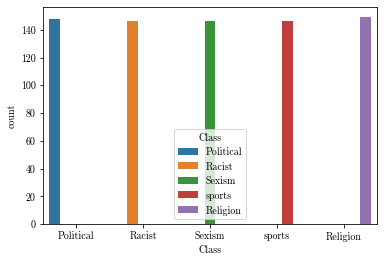

In [ ]:
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='Class',hue='Class',data=df)
plt.show()

In [ ]:
df.to_csv('cleaned data.csv')

balance data-Undersample

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored